10-05-2021<br>
Tensorflow-NB-1<br>
Basic classification: Classify images of clothing

In [1]:
# classify images of clothing, like sneakers and shirts.
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

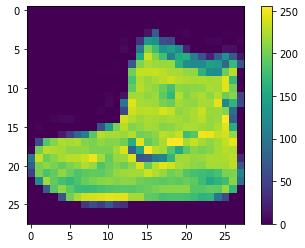

In [9]:
# Preprocessing the data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0
test_images  = test_images  / 255.0

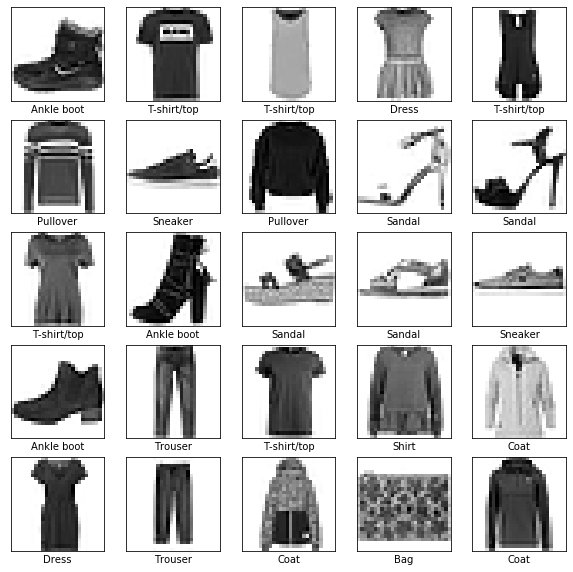

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
# Building the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [13]:
# compiling the model
model.compile(optimization='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [14]:
# Training the model
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 201us/sample - loss: 0.5150 - accuracy: 0.8188
Epoch 2/10
60000/60000 [==============================] - 9s 149us/sample - loss: 0.3789 - accuracy: 0.8637
Epoch 3/10
60000/60000 [==============================] - 10s 173us/sample - loss: 0.3475 - accuracy: 0.8759
Epoch 4/10
60000/60000 [==============================] - 10s 172us/sample - loss: 0.3300 - accuracy: 0.8833
Epoch 5/10
60000/60000 [==============================] - 10s 169us/sample - loss: 0.3167 - accuracy: 0.8873
Epoch 6/10
60000/60000 [==============================] - 10s 173us/sample - loss: 0.3065 - accuracy: 0.8922
Epoch 7/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.3000 - accuracy: 0.8953
Epoch 8/10
60000/60000 [==============================] - 10s 171us/sample - loss: 0.2934 - accuracy: 0.8986
Epoch 9/10
60000/60000 [==============================] - 10s 162us/sample - loss: 0.2884 - accuracy: 0.90

In [15]:
# Evaluating accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy: ',test_acc)

10000/1 - 1s - loss: 0.2858 - accuracy: 0.8776

Test accuracy:  0.8776


In [16]:
# Making prediction
probability_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [17]:
predictions[0]

array([2.24479901e-08, 2.33371499e-11, 3.04539016e-09, 8.63490399e-08,
       3.37362991e-08, 7.90609120e-05, 1.03973804e-07, 2.12114677e-03,
       2.46083255e-06, 9.97797132e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
test_labels[0]

9

In [20]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
              
                                        color=color)
    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    

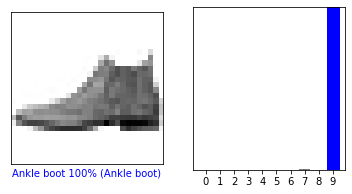

In [21]:
# Verifying predictions
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

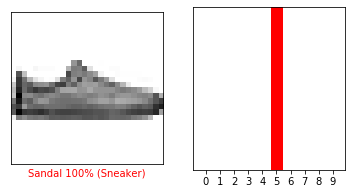

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

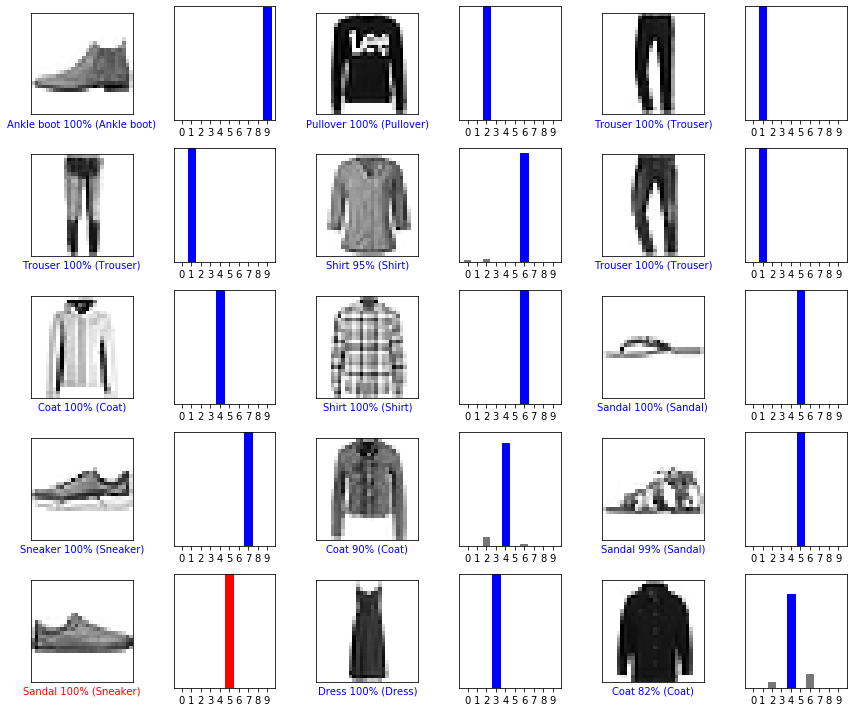

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [24]:
# Using the trained model
# Grab an imag from the test dataset
img = test_images[1]
print(img.shape)

(28, 28)


In [25]:
# Adding the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[2.9729318e-07 8.4297405e-18 9.9950457e-01 1.1647936e-12 1.1115305e-04
  7.5942892e-13 3.8404364e-04 4.8301059e-21 5.1823264e-12 1.9730500e-16]]


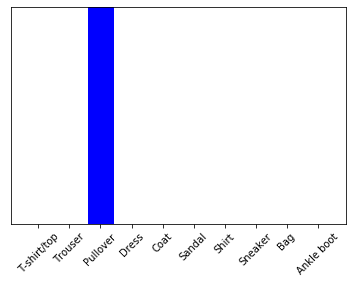

In [27]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [28]:
np.argmax(predictions_single[0])

2